In [ ]:
! unzip '/content/drive/MyDrive/Colab Notebooks/Cinsiyyet.zip'

In [21]:
import cv2
import numpy as np
import os
import pandas as pd

In [22]:
d = []
l = []
loc = '/content/Cinsiyyet'

for sinif in os.listdir(loc):
  for item in os.listdir(loc + '//' + sinif):
    if sinif =='Male':
      l.append(0)
    else:
      l.append(1)
    d.append(os.path.join(loc,sinif,item))

df = pd.DataFrame()
df['Picture'],df['Label'] = d,l
df

,Picture,Label
0,/content/Cinsiyyet/Male/181997.jpg.jpg,0
1,/content/Cinsiyyet/Male/073804.jpg.jpg,0
2,/content/Cinsiyyet/Male/170075.jpg.jpg,0
3,/content/Cinsiyyet/Male/155509.jpg.jpg,0
4,/content/Cinsiyyet/Male/193055.jpg.jpg,0
...,...,...
58653,/content/Cinsiyyet/Female/181898.jpg.jpg,1
58654,/content/Cinsiyyet/Female/130465.jpg.jpg,1
58655,/content/Cinsiyyet/Female/115679.jpg.jpg,1
58656,/content/Cinsiyyet/Female/150329.jpg.jpg,1


In [28]:
dat = []
lab = []
loc = '/content/Cinsiyyet'


for clas in os.listdir(loc):
  for series in os.listdir(loc + '//' + clas):
    pic = cv2.imread(os.path.join(loc,clas,series))
    pic = cv2.resize(pic,(50,50))
    pic = pic.astype('float32')
    pic = pic/255
    dat.append(pic)
    if clas =='Male':
      lab.append(0)
    else:
      lab.append(1)


In [29]:
dfm=pd.DataFrame()
dfm['Pic'],dfm['Label']=dat,lab
dfm

,Pic,Label
0,"[[[0.22745098, 0.22745098, 0.22745098], [0.356...",0
1,"[[[0.7490196, 0.83137256, 0.8235294], [0.81960...",0
2,"[[[0.15294118, 0.16862746, 0.17254902], [0.160...",0
3,"[[[0.12156863, 0.16078432, 0.105882354], [0.11...",0
4,"[[[0.09803922, 0.12941177, 0.16078432], [0.098...",0
...,...,...
58653,"[[[0.003921569, 0.007843138, 0.050980393], [0....",1
58654,"[[[0.06666667, 0.078431375, 0.07058824], [0.05...",1
58655,"[[[0.23137255, 0.32941177, 0.4509804], [0.1411...",1
58656,"[[[0.9254902, 0.8980392, 0.89411765], [0.83921...",1


In [32]:
dat = np.array(dat)
lab = np.array(lab)

np.savez('/content/drive/MyDrive/Colab Notebooks/Datas.npz',dat)
np.savez('/content/drive/MyDrive/Colab Notebooks/Labels.npz',lab)   #Save datas in google drive

## Deep Learning Modelling

In [8]:
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2

x = np.load('/content/drive/MyDrive/Colab Notebooks/Datas.npz')['arr_0']
y = np.load('/content/drive/MyDrive/Colab Notebooks/Labels.npz')['arr_0']

y = to_categorical(y,2)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.2)
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain,test_size=0.15,shuffle=True)

row,column,layer = xtrain.shape[1:]

In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(row,column,layer),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(row,column,layer),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(row,column,layer),kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer=Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

result = model.fit(xtrain,ytrain,validation_data=(xval,yval),epochs=30)

model.save('/content/drive/MyDrive/Colab Notebooks/Sexmodelling.h5')

Epoch 1/30
1247/1247 [==============================] - 34s 19ms/step - loss: 1.3474 - accuracy: 0.8350 - val_loss: 1.0679 - val_accuracy: 0.9327
Epoch 2/30
1247/1247 [==============================] - 22s 17ms/step - loss: 1.1215 - accuracy: 0.9078 - val_loss: 1.0171 - val_accuracy: 0.9466
Epoch 3/30
1247/1247 [==============================] - 24s 19ms/step - loss: 1.0420 - accuracy: 0.9281 - val_loss: 0.9601 - val_accuracy: 0.9560
Epoch 4/30
1247/1247 [==============================] - 23s 19ms/step - loss: 0.9762 - accuracy: 0.9398 - val_loss: 0.9126 - val_accuracy: 0.9575
Epoch 5/30
1247/1247 [==============================] - 24s 19ms/step - loss: 0.9134 - accuracy: 0.9452 - val_loss: 0.8550 - val_accuracy: 0.9588
Epoch 6/30
1247/1247 [==============================] - 22s 18ms/step - loss: 0.8463 - accuracy: 0.9505 - val_loss: 0.7898 - val_accuracy: 0.9619
Epoch 7/30
1247/1247 [==============================] - 23s 18ms/step - loss: 0.7734 - accuracy: 0.9539 - val_loss: 0.7171 -

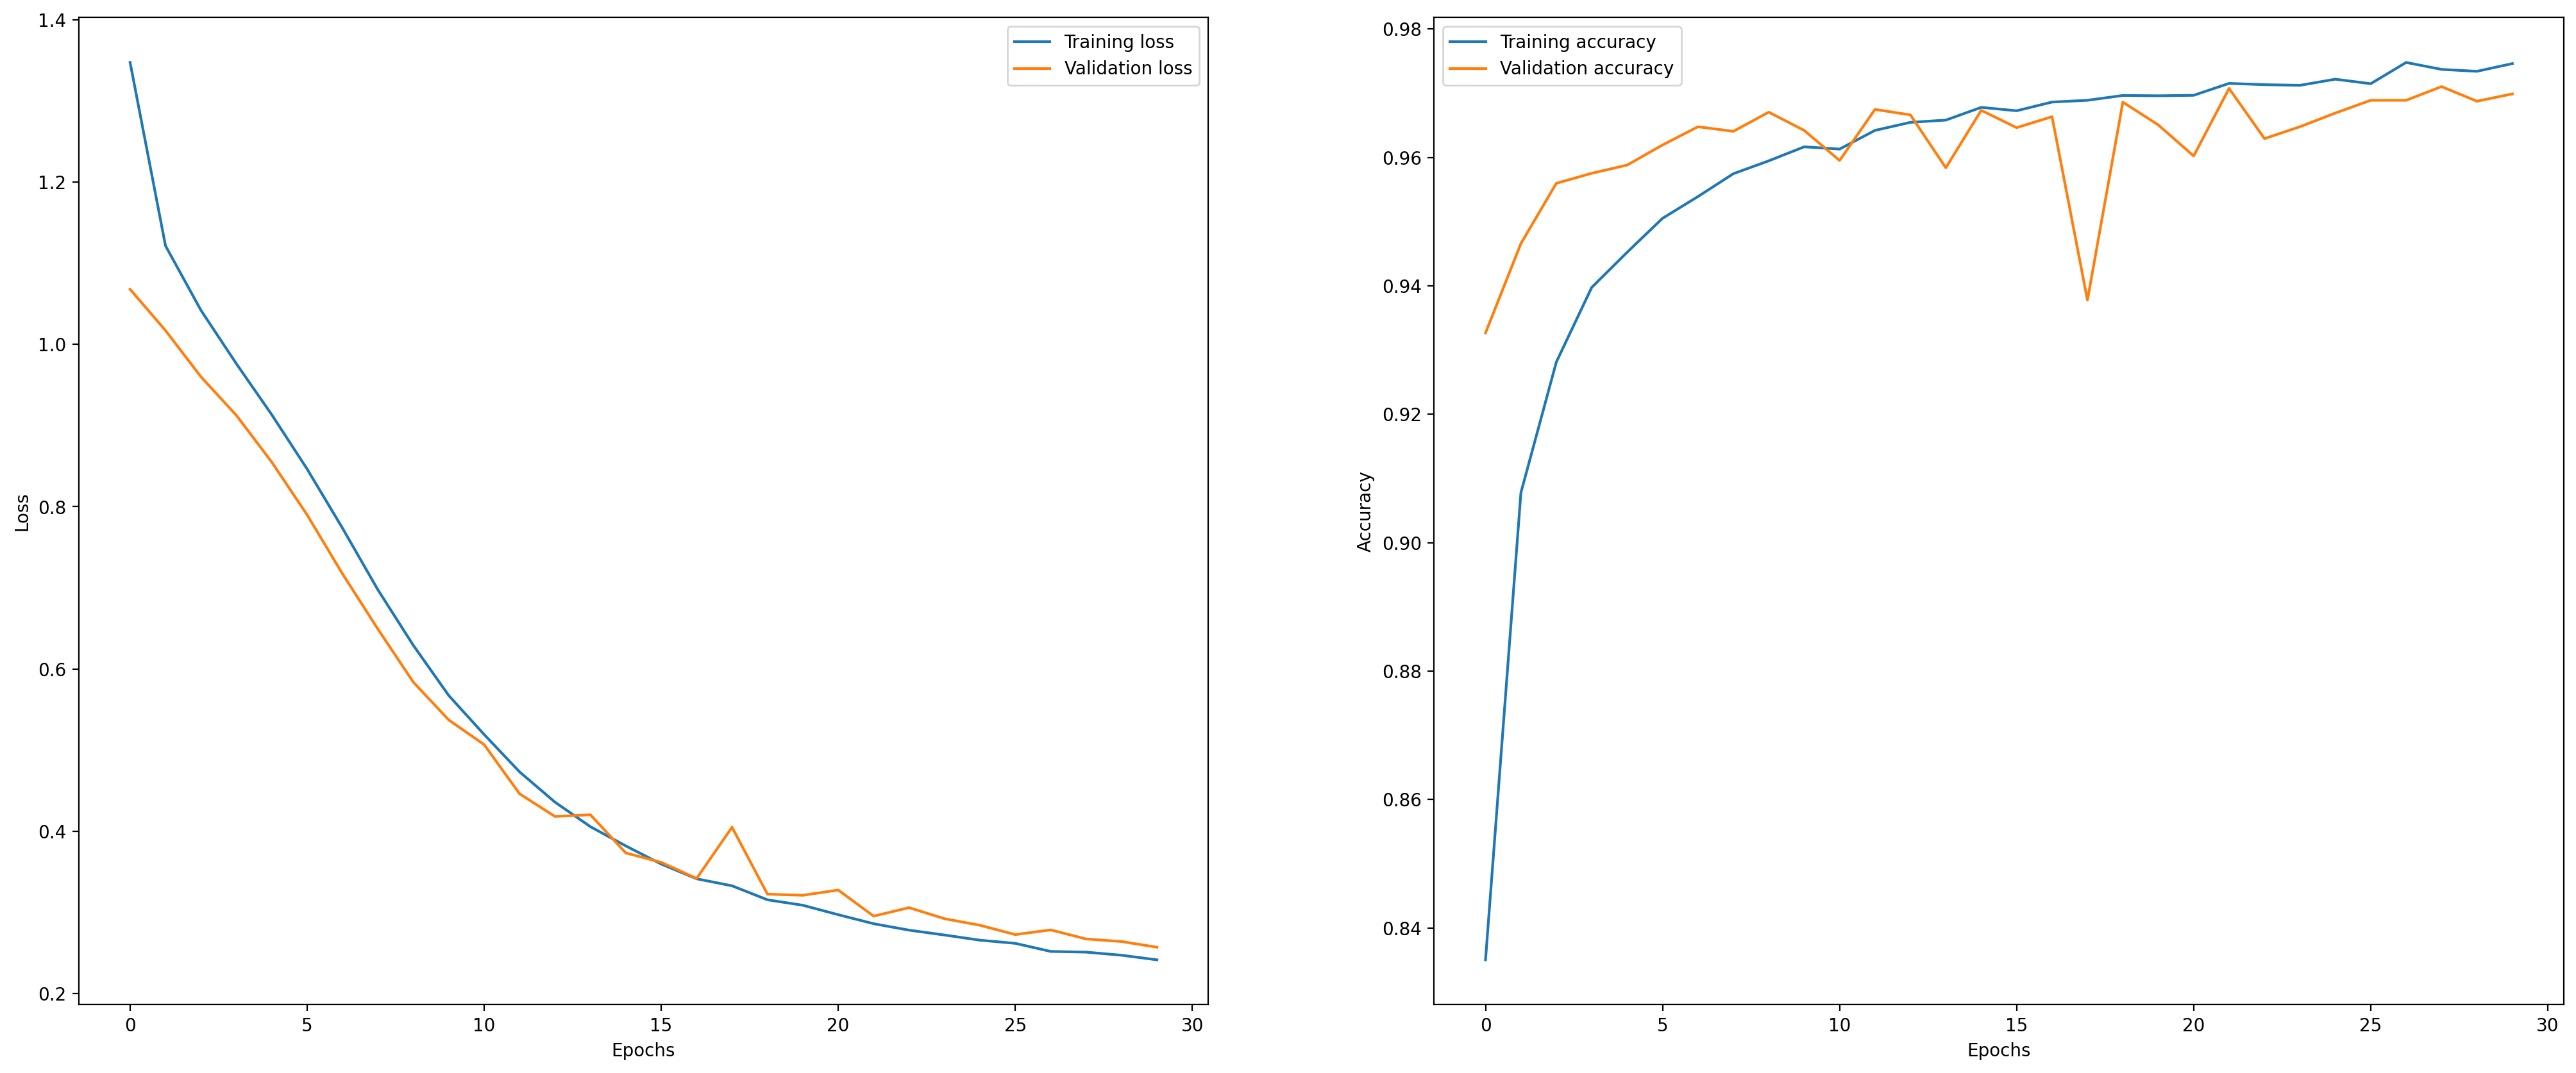

In [23]:
fig,ax = plt.subplots(1,2,figsize=(25,10),dpi=200)
ax[0].plot(result.history['loss'],label = 'Training loss')
ax[0].plot(result.history['val_loss'],label = 'Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(result.history['accuracy'],label = 'Training accuracy')
ax[1].plot(result.history['val_accuracy'],label = 'Validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

## Using CNN model

1/1 [==============================] - 0s 268ms/step


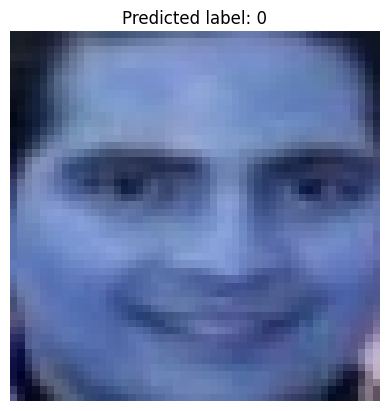

In [13]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2

model = load_model('/content/drive/MyDrive/Colab Notebooks/Sexmodelling.h5')

pic = cv2.imread('/content/Cinsiyyet/Male/063443.jpg.jpg')
pic = cv2.resize(pic,(50,50))
pic = np.expand_dims(pic,axis=0)

predict = model.predict(pic)

predict_label = np.argmax(predict)

plt.imshow(pic[0])
plt.title(f'Predicted label: {predict_label}')
plt.axis('off')
plt.show()